In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.initializers import HeNormal
from keras.regularizers import l1, l2

In [3]:
df = pd.read_pickle('../../Base de datos/train_clean.pkl')
df

,feature_2,feature_3,feature_4,feature_6,feature_7,feature_9,feature_12,feature_13,feature_14,feature_15,...,feature_197,feature_201,feature_204,feature_207,feature_208,feature_212,feature_216,feature_217,feature_218,target
3,0.5,0.0,0.000000,0.001299,0.087886,0.002227,0.000113,0.0,0.000011,0.013514,...,0.034483,0.042598,0.012136,0.013420,0.026187,0.003375,0.020597,0.002580,0.0,1
6,1.0,0.0,0.000018,0.014286,0.571429,0.001050,0.000113,0.0,0.000046,0.114286,...,0.022989,0.042971,0.001849,0.011287,0.029193,0.005062,0.199603,0.004473,0.0,1
7,1.0,0.0,0.000259,0.040909,0.571429,0.000923,0.000845,0.0,0.001890,0.877660,...,0.017241,0.056945,0.008079,0.000320,0.216927,0.001125,0.106760,0.005346,0.0,1
10,0.5,0.0,0.000120,0.005844,0.263771,0.001273,0.000225,0.0,0.000046,0.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1
11,0.5,0.0,0.000164,0.017532,0.571429,0.000032,0.000056,0.0,0.000011,1.000000,...,0.022989,0.065277,0.009147,0.008748,0.209485,0.000562,0.020597,0.005515,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467454,0.5,0.0,0.000000,0.070779,0.285714,0.000859,0.000056,0.0,0.000011,0.037037,...,0.051724,0.034712,0.010139,0.085771,0.069349,0.002812,0.020597,0.006062,0.0,1
467457,1.0,0.0,0.000163,0.000000,0.163314,0.000064,0.000113,0.0,0.000023,1.000000,...,0.063218,0.032673,0.004626,0.001302,0.057865,0.001687,0.069309,0.006433,0.0,1
467459,0.5,0.0,0.000125,0.000000,0.380914,0.001273,0.000169,0.0,0.000046,0.100000,...,0.183908,0.033275,0.001822,0.000768,0.024046,0.014623,0.045383,0.004853,0.0,1
467461,0.5,0.0,0.000078,0.035714,0.000000,0.002195,0.000056,0.0,0.000023,0.028986,...,0.022989,0.046901,0.017513,0.012908,0.205344,0.001125,0.020597,0.006386,0.0,1


In [4]:
from sklearn.utils import resample

# Separar las clases mayoritaria y minoritaria
df_majority = df[df.target==1]
df_minority = df[df.target==0]

# Sobremuestreo de la clase minoritaria
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # Muestreo con reemplazo
                                 n_samples=len(df_majority),    # Coincide con el número en la clase mayoritaria
                                 random_state=42) 

# Combinar la clase mayoritaria con la clase minoritaria sobremuestreada
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Mostrar el nuevo recuento de clases
df_upsampled.target.value_counts()

target
1    192301
0    192301
Name: count, dtype: int64

In [5]:
# Submuestreo de la clase mayoritaria
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # Muestreo sin reemplazo
                                   n_samples=len(df_minority),  # Coincide con el número en la clase minoritaria
                                   random_state=42) 

# Combinar la clase minoritaria con la clase mayoritaria submuestreada
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Mostrar el nuevo recuento de clases
df_downsampled.target.value_counts()

target
1    30876
0    30876
Name: count, dtype: int64

In [6]:
X = df_upsampled.drop(columns = ['target'])
y = df_upsampled['target']

# Reescalamos datos

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_scaled

array([[-0.09550743, -0.24659532, -0.06203389, ..., -0.35344528,
        -0.14087963, -1.40344126],
       [ 1.47384858, -0.24659532, -0.06048764, ...,  1.41457466,
        -0.02441051, -1.40344126],
       [ 1.47384858, -0.24659532, -0.03965707, ...,  0.49757798,
         0.0293089 , -1.40344126],
       ...,
       [-1.66486344, -0.24659532, -0.06203389, ..., -0.55687875,
        -0.29959107,  0.71253428],
       [-0.09550743, -0.24659532, -0.06095444, ..., -0.35344528,
        -0.10303113,  0.71253428],
       [-0.09550743, -0.24659532, -0.05189576, ..., -0.35344528,
        -0.06128572,  0.71253428]])

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [10]:
np.shape(X_val)

(115381, 120)

# Unimos coeficeintes con datos

In [11]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))

In [12]:
train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(120,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

# Mezclar y procesar por lotes los conjuntos de datos

In [13]:
BATCH_SIZE = 100
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE)

# Creación del modelo

In [14]:
model = Sequential()

# Flatten layer
model.add(Flatten(input_shape=(120,)))

# Batch normalization
model.add(BatchNormalization())

# First set of dense layers
model.add(Dense(120, activation='tanh', kernel_initializer=HeNormal(), kernel_regularizer=l1(0.001)))
model.add(Dense(120, activation='tanh', kernel_initializer=HeNormal(), kernel_regularizer=l1(0.001)))
model.add(Dense(120, activation='tanh', kernel_initializer=HeNormal(), kernel_regularizer=l1(0.001)))
model.add(Dense(120, activation='tanh', kernel_initializer=HeNormal(), kernel_regularizer=l1(0.001)))

# Second set of dense layers
model.add(Dense(60, activation='tanh', kernel_initializer=HeNormal(), kernel_regularizer=l1(0.001)))
model.add(Dense(60, activation='tanh', kernel_initializer=HeNormal(), kernel_regularizer=l1(0.001)))
model.add(Dense(60, activation='tanh', kernel_initializer=HeNormal(), kernel_regularizer=l1(0.001)))
model.add(Dense(60, activation='tanh', kernel_initializer=HeNormal(), kernel_regularizer=l1(0.001)))

# Dropout layer
model.add(Dropout(0.2))

# Another batch normalization
model.add(BatchNormalization())

# Output layer
model.add(Dense(1, activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 120)               0         
                                                                 
 batch_normalization (BatchN  (None, 120)              480       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 120)               14520     
                                                                 
 dense_1 (Dense)             (None, 120)               14520     
                                                                 
 dense_2 (Dense)             (None, 120)               14520     
                                                                 
 dense_3 (Dense)             (None, 120)               14520     
                                                        

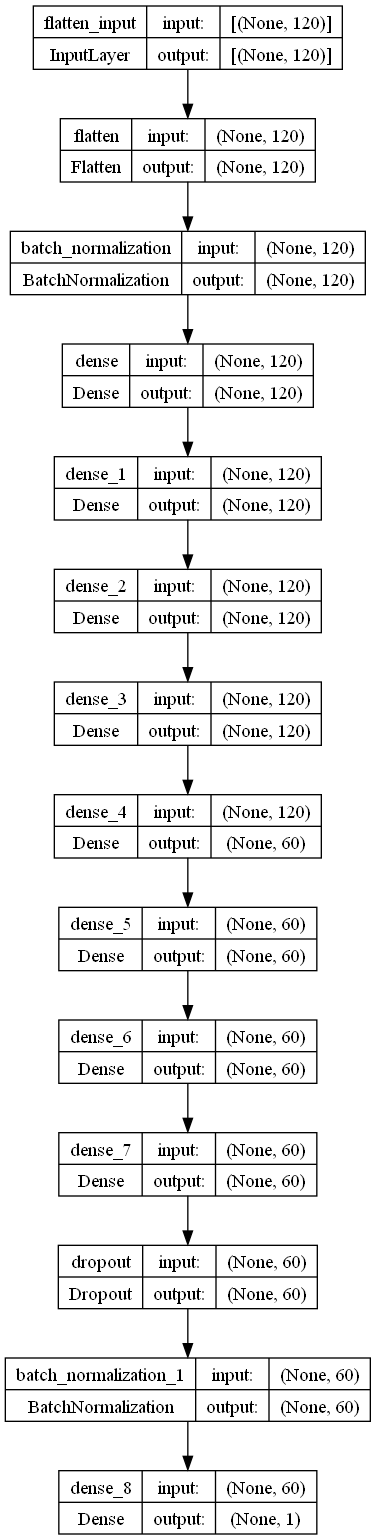

In [16]:
keras.utils.plot_model(model,show_shapes=True)

# Entrenamos el modelo

In [17]:
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001,clipvalue=100.0)

In [18]:
def total_mae_loss(y_true, y_pred):
    total_loss = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    tf.print(y_true, summarize = -1)
    tf.print(y_pred, summarize = -1)
    return total_loss

In [39]:
def brier_score(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

metrics = [ ]

In [40]:
model.compile(optimizer='adam',
              loss= 'binary_crossentropy',
              metrics=['accuracy'])

In [45]:
model.compile(optimizer= optimizer,
              loss= 'binary_crossentropy',
              metrics=[brier_score, 'accuracy'])

In [46]:
def scheduler(epoch, lr):
  if epoch < 400:
    return lr
  else:
    return -1.65e-6*epoch +  0.00166

In [ ]:
val_epochs = 50

early_stop = tf.keras.callbacks.EarlyStopping( monitor = 'val_accuracy', patience = 1000,verbose = 1, 
                                              restore_best_weights = True)

#class_weights = {0: 1., 1: 0.2}  # asigna más peso a la clase 0


reduce_lr = tf.keras.callbacks.LearningRateScheduler(scheduler)
#history = model.fit(train_dataset, validation_data=val_dataset, epochs= val_epochs, callbacks=[reduce_lr, early_stop],
#                    class_weight=class_weights)
history = model.fit(train_dataset, validation_data=val_dataset, epochs= val_epochs, callbacks=[reduce_lr, early_stop])

Epoch 1/50
2693/2693 [==============================] - 7s 2ms/step - loss: 0.6871 - brier_score: 0.2382 - accuracy: 0.5892 - val_loss: 0.6867 - val_brier_score: 0.2378 - val_accuracy: 0.5895 - lr: 0.0010
Epoch 2/50
2693/2693 [==============================] - 6s 2ms/step - loss: 0.6873 - brier_score: 0.2382 - accuracy: 0.5894 - val_loss: 0.6871 - val_brier_score: 0.2377 - val_accuracy: 0.5910 - lr: 0.0010
Epoch 3/50
2693/2693 [==============================] - 6s 2ms/step - loss: 0.6873 - brier_score: 0.2382 - accuracy: 0.5902 - val_loss: 0.6862 - val_brier_score: 0.2379 - val_accuracy: 0.5900 - lr: 0.0010
Epoch 4/50
2693/2693 [==============================] - 6s 2ms/step - loss: 0.6873 - brier_score: 0.2382 - accuracy: 0.5887 - val_loss: 0.6880 - val_brier_score: 0.2379 - val_accuracy: 0.5892 - lr: 0.0010
Epoch 5/50
2693/2693 [==============================] - 6s 2ms/step - loss: 0.6869 - brier_score: 0.2381 - accuracy: 0.5898 - val_loss: 0.6890 - val_brier_score: 0.2392 - val_accur

In [34]:
evaluación = X_val[2]

In [35]:
X_test1_None = evaluación[None, :]

In [36]:
prediction = model.predict(X_test1_None)
print(prediction)

1/1 [==============================] - 0s 12ms/step
[[0.72220325]]


In [37]:
y_val.iloc[0:10]

444451    1
339125    1
304278    0
296098    0
338386    0
410445    1
222279    0
13651     1
325920    0
292666    1
Name: target, dtype: int32